# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10,6)

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
# Your code here
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1


In [5]:
# Your comment here
websites.shape

(1781, 21)

In [6]:
# Null values and data types
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [7]:
# Columns names
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [8]:
print(f'Columns that contain the features of the websites: {set(websites.columns[0:-1])}')
print(f'Column that contains the feature we will predict: {websites.columns[-1]}') 

Columns that contain the features of the websites: {'SOURCE_APP_PACKETS', 'CHARSET', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'WHOIS_STATEPRO', 'DNS_QUERY_TIMES', 'WHOIS_UPDATED_DATE', 'URL', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_REGDATE', 'NUMBER_SPECIAL_CHARACTERS', 'REMOTE_APP_PACKETS', 'APP_BYTES', 'SOURCE_APP_BYTES', 'CONTENT_LENGTH', 'APP_PACKETS', 'URL_LENGTH', 'REMOTE_APP_BYTES'}
Column that contains the feature we will predict: Type


In [9]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In the column 'Type', there are more 0's than 1's. We suppose that malicious sites are categorized with 1 and benign with 0.

In [10]:
print(f'We should transform some columns from str to datetime values. These columns are: {websites.columns[8]}, {websites.columns[9]}')

We should transform some columns from str to datetime values. These columns are: WHOIS_REGDATE, WHOIS_UPDATED_DATE


In [11]:
print(type(websites.WHOIS_REGDATE[0]))
print(type(websites.WHOIS_UPDATED_DATE[0]))

<class 'str'>
<class 'str'>


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [12]:
# Your code here
numeric_data = websites.select_dtypes(include='number')
numeric_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


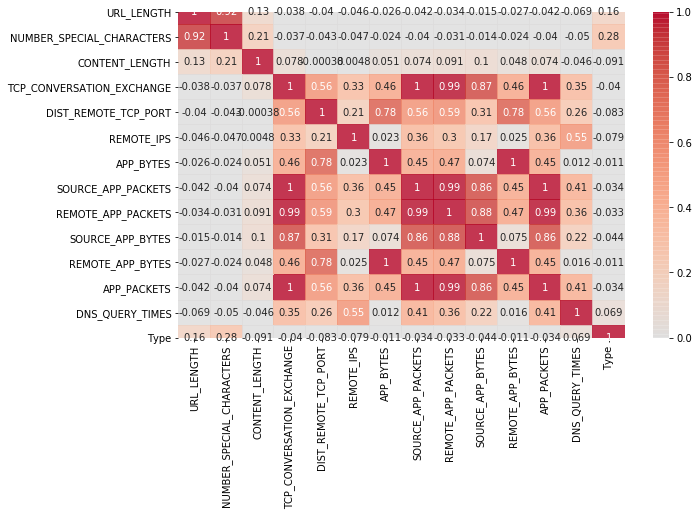

In [13]:
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True,vmin=0, center = 0, vmax=1, alpha=0.8);

In [14]:
# Filter to detect high collinearity
# High collinearity > 90%
# sns.heatmap(numeric_data.corr()> 0.90, cmap='coolwarm',alpha=0.8);

In [15]:
# Your comment here
print(f'The columns with higher collinearity are:')
print(f'{numeric_data.columns[3]} - {numeric_data.columns[7]}/{numeric_data.columns[-2]}')
print(f'{numeric_data.columns[6]} - {numeric_data.columns[-3]}')
print(f'{numeric_data.columns[-2]} - {numeric_data.columns[7]}')

The columns with higher collinearity are:
TCP_CONVERSATION_EXCHANGE - SOURCE_APP_PACKETS/DNS_QUERY_TIMES
APP_BYTES - APP_PACKETS
DNS_QUERY_TIMES - SOURCE_APP_PACKETS


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [16]:
# Your code here
# First, remove the two columns with have the highest collinearity with others: 'APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE'
websites_it0=numeric_data.drop(['TCP_CONVERSATION_EXCHANGE','NUMBER_SPECIAL_CHARACTERS'], axis = 1)
websites_it0.head()

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,263.0,0,2,700,9,10,1153,832,9,2.0,1
1,16,15087.0,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,324.0,0,0,0,0,0,0,0,0,0.0,0
3,17,162.0,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,124140.0,2,5,4278,61,62,129889,4586,61,4.0,0


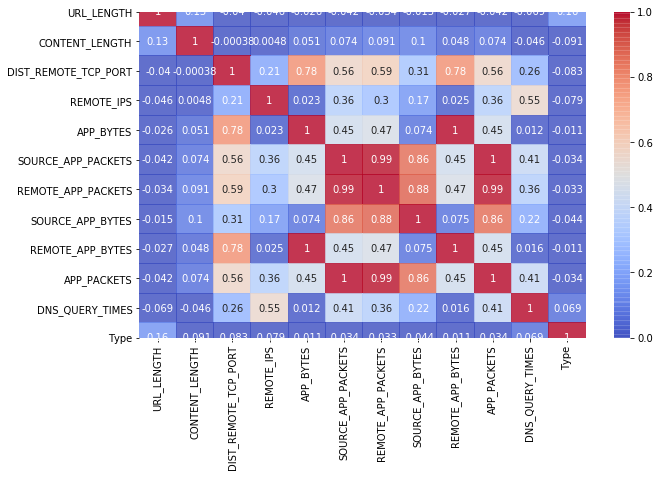

In [17]:
sns.heatmap(websites_it0.corr(), cmap='coolwarm', annot=True,vmin=0, vmax=1, alpha=0.8);

In [18]:
websites_it1=websites_it0.drop(['SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','APP_BYTES'], axis = 1)

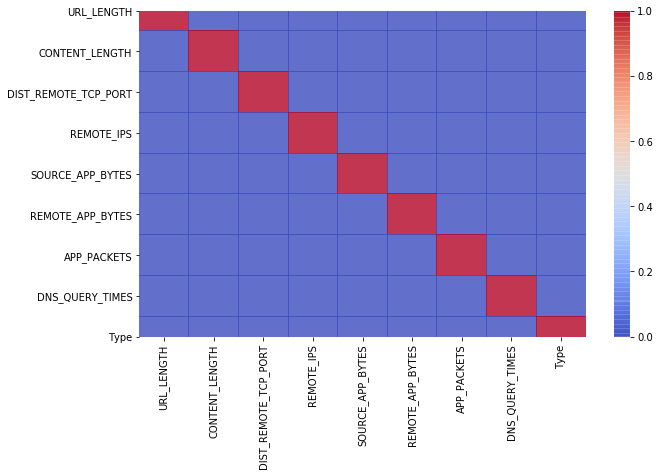

In [19]:
sns.heatmap(websites_it1.corr()>0.9, cmap='coolwarm', alpha=0.8);

In [20]:
# Your code here
columns_to_remove= ['TCP_CONVERSATION_EXCHANGE','NUMBER_SPECIAL_CHARACTERS','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','APP_BYTES']

df_websites = websites.drop(columns=columns_to_remove)

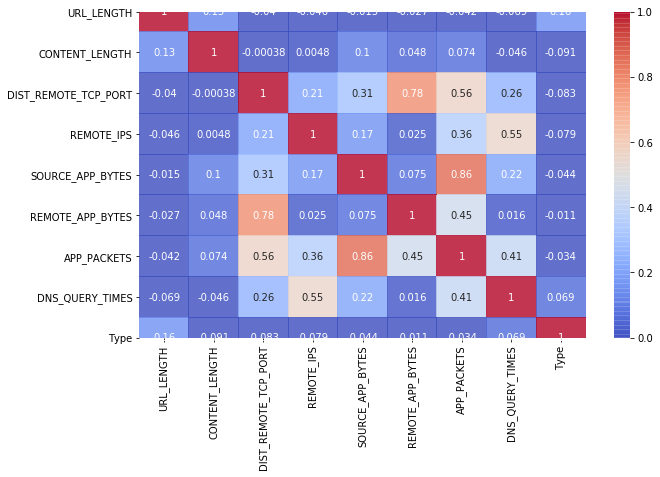

In [21]:
# Print heatmap again
sns.heatmap(df_websites.corr(), cmap='coolwarm', annot=True,vmin=0, vmax=1, alpha=0.8);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [22]:
# Your code here
df_websites.shape

(1781, 16)

In [23]:
df_websites.isnull().sum()

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
SOURCE_APP_BYTES          0
REMOTE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

In [24]:
df_websites.isnull().mean()

URL                     0.000000
URL_LENGTH              0.000000
CHARSET                 0.000000
SERVER                  0.000561
CONTENT_LENGTH          0.455924
WHOIS_COUNTRY           0.000000
WHOIS_STATEPRO          0.000000
WHOIS_REGDATE           0.000000
WHOIS_UPDATED_DATE      0.000000
DIST_REMOTE_TCP_PORT    0.000000
REMOTE_IPS              0.000000
SOURCE_APP_BYTES        0.000000
REMOTE_APP_BYTES        0.000000
APP_PACKETS             0.000000
DNS_QUERY_TIMES         0.000561
Type                    0.000000
dtype: float64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [25]:
# Your code here
# Drop 'CONTENT_LENGTH' --> more than 45% of missing values
df_websites.drop(columns =['CONTENT_LENGTH'],inplace=True)

In [26]:
# Check rows with missing values
null_data = df_websites[df_websites.isnull().any(axis=1)]
null_data

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,66,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,2,4,246,1026,15,0.0,0
1659,B0_772,101,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,2,2,416,276,4,NaN,0


In [27]:
# df_websites['SERVER'].unique()

In [28]:
#df_websites['DNS_QUERY_TIMES'].unique()

In [29]:
# Your comment here
# Columns 'SERVER' and 'DNS_QUERY_TIMES' have only one missing value --> Replacing the missing value
df_websites.SERVER.fillna(0, inplace=True)
df_websites.DNS_QUERY_TIMES.fillna('None', inplace=True)
df_websites.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1265,1230,17,0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0,0
3,B0_113,17,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,18784,4380,39,8,0
4,B0_403,17,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,129889,4586,61,4,0


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [30]:
# Examine missing values in each column
df_websites.isnull().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
SOURCE_APP_BYTES        0
REMOTE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [31]:
# Your code here
df_websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [32]:
df_websites.WHOIS_COUNTRY=df_websites.WHOIS_COUNTRY.str.replace('Cyprus','CY').replace('us','US').replace('se','SE').replace("[u'GB'; u'UK']",'GB, United Kingdom')

In [33]:
df_websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'GB, United Kingdom', 'FR', 'NL', 'UG', 'JP', 'CN',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'KR', 'HK', 'UA', 'CH', 'United Kingdom', 'BS',
       'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

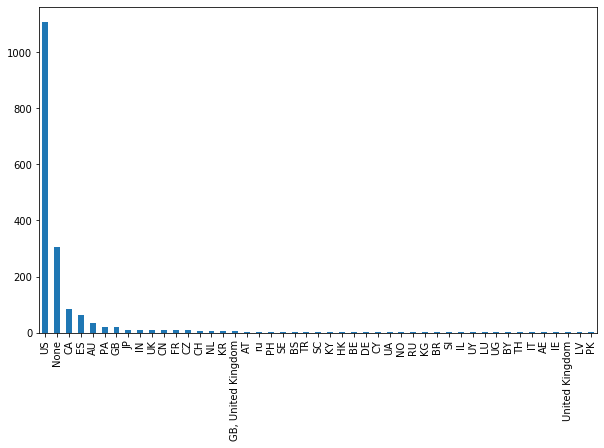

In [34]:
# Your code here
plt.figure(figsize=(10, 6))
df_websites.WHOIS_COUNTRY.value_counts().plot(kind='bar');

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [35]:
# Your code here
top10=df_websites.WHOIS_COUNTRY.value_counts().nlargest(10).reset_index()
top10.rename(columns={'index' : 'COUNTRY'}, inplace=True)
top10_countries = list(top10.COUNTRY)
top10_countries

['US', 'None', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'IN', 'UK']

In [36]:
df_websites.WHOIS_COUNTRY = df_websites.WHOIS_COUNTRY.apply(lambda x: 'OTHER' if x not in top10_countries else x)

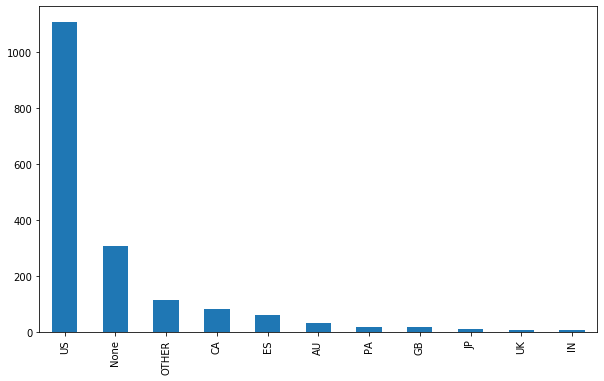

In [37]:
plt.figure(figsize=(10, 6))
df_websites.WHOIS_COUNTRY.value_counts().plot(kind='bar');

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [38]:
# Your code here
df_websites.drop(columns =['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],inplace=True)

In [39]:
df_websites.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,0,2,1153,832,9,2,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,7,4,1265,1230,17,0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0,0
3,B0_113,17,ISO-8859-1,nginx,US,22,3,18784,4380,39,8,0
4,B0_403,17,UTF-8,None,US,2,5,129889,4586,61,4,0


In [40]:
df_websites.shape

(1781, 12)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [41]:
# Your code here
df_websites.dtypes

URL                     object
URL_LENGTH               int64
CHARSET                 object
SERVER                  object
WHOIS_COUNTRY           object
DIST_REMOTE_TCP_PORT     int64
REMOTE_IPS               int64
SOURCE_APP_BYTES         int64
REMOTE_APP_BYTES         int64
APP_PACKETS              int64
DNS_QUERY_TIMES         object
Type                     int64
dtype: object

In [42]:
df_websites.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,0,2,1153,832,9,2,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,7,4,1265,1230,17,0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0,0
3,B0_113,17,ISO-8859-1,nginx,US,22,3,18784,4380,39,8,0
4,B0_403,17,UTF-8,None,US,2,5,129889,4586,61,4,0


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [43]:
# Your code here
df_websites.drop(columns =['URL'],inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [44]:
# Your code here
df_websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [45]:
# Your code here
# df_websites.SERVER.unique()

![Think Hard](../images/think-hard.jpg)

In [46]:
# Your comment here
df_websites.SERVER.value_counts()
# Apache, nginx, (None?), Microsoft

Apache                                                                    386
nginx                                                                     211
None                                                                      175
Microsoft-HTTPAPI/2.0                                                     113
cloudflare-nginx                                                           94
                                                                         ... 
Apache/2.2.14 (Ubuntu)                                                      1
Scratch Web Server                                                          1
Proxy Pandeiro UOL                                                          1
Apache/2.2.31 (FreeBSD) PHP/5.4.15 mod_ssl/2.2.31 OpenSSL/1.0.2d DAV/2      1
0                                                                           1
Name: SERVER, Length: 240, dtype: int64

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [47]:
# Your code here
# servers = ['Microsoft', 'Apache', 'nginx']


df_websites.SERVER = df_websites.SERVER.apply(lambda x: 'Microsoft' if 'Microsoft' in str(x) else 
                                              'Apache' if 'Apache' in str(x) else 
                                              'nginx' if 'nginx' in str(x) else 'Other')

In [48]:
# Count `SERVER` value counts here
df_websites.SERVER.value_counts()

Apache       643
Other        505
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [49]:
# Your code here
website_dummy=pd.get_dummies(df_websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [50]:
# Your code here
website_dummy.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,Type,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,...,DNS_QUERY_TIMES_2.0,DNS_QUERY_TIMES_4.0,DNS_QUERY_TIMES_6.0,DNS_QUERY_TIMES_8.0,DNS_QUERY_TIMES_9.0,DNS_QUERY_TIMES_10.0,DNS_QUERY_TIMES_12.0,DNS_QUERY_TIMES_14.0,DNS_QUERY_TIMES_20.0,DNS_QUERY_TIMES_None
0,16,0,2,1153,832,9,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,16,7,4,1265,1230,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,22,3,18784,4380,39,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,17,2,5,129889,4586,61,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [51]:
website_dummy.dtypes

URL_LENGTH              int64
DIST_REMOTE_TCP_PORT    int64
REMOTE_IPS              int64
SOURCE_APP_BYTES        int64
REMOTE_APP_BYTES        int64
APP_PACKETS             int64
Type                    int64
CHARSET_ISO-8859-1      uint8
CHARSET_None            uint8
CHARSET_UTF-8           uint8
CHARSET_iso-8859-1      uint8
CHARSET_us-ascii        uint8
CHARSET_utf-8           uint8
CHARSET_windows-1251    uint8
CHARSET_windows-1252    uint8
SERVER_Microsoft        uint8
SERVER_Other            uint8
SERVER_nginx            uint8
WHOIS_COUNTRY_CA        uint8
WHOIS_COUNTRY_ES        uint8
WHOIS_COUNTRY_GB        uint8
WHOIS_COUNTRY_IN        uint8
WHOIS_COUNTRY_JP        uint8
WHOIS_COUNTRY_None      uint8
WHOIS_COUNTRY_OTHER     uint8
WHOIS_COUNTRY_PA        uint8
WHOIS_COUNTRY_UK        uint8
WHOIS_COUNTRY_US        uint8
DNS_QUERY_TIMES_2.0     uint8
DNS_QUERY_TIMES_4.0     uint8
DNS_QUERY_TIMES_6.0     uint8
DNS_QUERY_TIMES_8.0     uint8
DNS_QUERY_TIMES_9.0     uint8
DNS_QUERY_

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [52]:
from sklearn.model_selection import train_test_split

# Your code here:
# Get X,y
X = website_dummy.drop('Type', axis=1).values
y = website_dummy.Type

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

## Logistic regression

In [54]:
# Your code here:
# Import library
from sklearn.linear_model import LogisticRegression

In [55]:
# Increase the number of iterations
model=LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [56]:
# Your code here:
model.fit(X_train, y_train)
model

D:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
model.score(X_train, y_train)

0.9297752808988764

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

## Evaluate the model

In [58]:
model.score(X_test, y_test)

0.907563025210084

In [59]:
# Your code here:
# Import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [60]:
y_pred= model.predict(X_test)

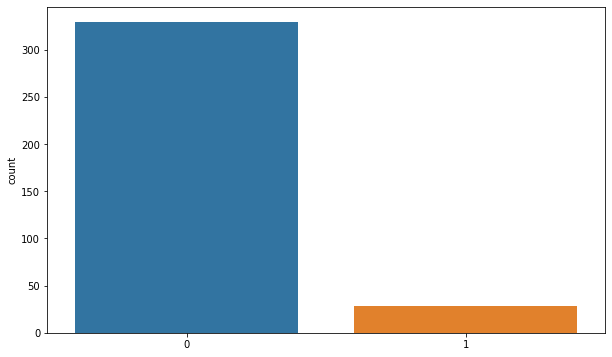

In [61]:
sns.countplot(y_pred)

In [62]:
sum(y_test==0)/len(y_test)

0.8683473389355743

In [63]:
?confusion_matrix

Signature: confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array, shape = [n_samples]
    Ground truth (correct) target values.

y_pred : array, shape = [n_samples]
    Estimated targets as returned by a classifier.

labels : array, shape = [n_classes], optional
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If none is given, those that appear at least once
    in ``y_true`` or

In [64]:
confusion_matrix(y_test,y_pred)

array([[303,   7],
       [ 26,  21]], dtype=int64)

In [65]:
# Accuracy: Out of all the examples how many were correctly predicted
accuracy_score(y_test, y_pred)

0.907563025210084

What are your thoughts on the performance of the model? Write your conclusions below.

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(f'TN={tn}')
print(f'FP={fp}')
print(f'FN={fn}')
print(f'TP={tp}')

TN=303
FP=7
FN=26
TP=21


In [67]:
# Your conclusions here:

# The model is predicting well the True Negative (0) values, while True positive (1) are predicted NOT very well.
# From 310, we have 303 well assigned, which is 98% aprox.
# From 47 values only 21 are well assigned, which is only 45%. 

# Malicious websites are worse modeled than benign websites.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [68]:
# Your code here:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier

In [69]:
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=3)

In [70]:
# Fit the model on the training data.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [71]:
knn.score(X_train, y_train)

0.9606741573033708

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [72]:
# Your code here:
knn.score(X_test, y_test)

0.907563025210084

In [73]:
y_pred= knn.predict(X_test)

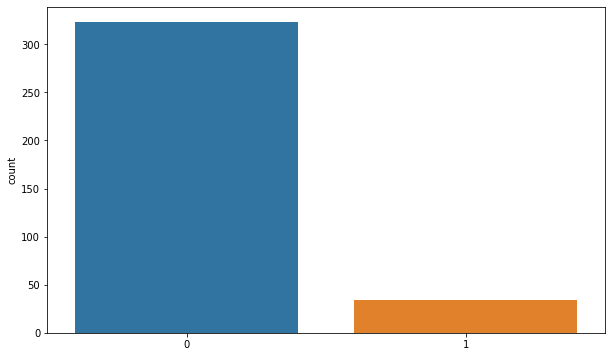

In [74]:
sns.countplot(y_pred)

In [75]:
confusion_matrix(y_test,y_pred)

array([[300,  10],
       [ 23,  24]], dtype=int64)

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(f'TN={tn}')
print(f'FP={fp}')
print(f'FN={fn}')
print(f'TP={tp}')

TN=300
FP=10
FN=23
TP=24


In [77]:
accuracy_score(y_test, y_pred)

0.907563025210084

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [78]:
# Your code here:
knn = KNeighborsClassifier(n_neighbors=5)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
knn.score(X_train, y_train)

0.9501404494382022

In [81]:
knn.score(X_test, y_test)

0.9047619047619048

In [82]:
y_pred= knn.predict(X_test)

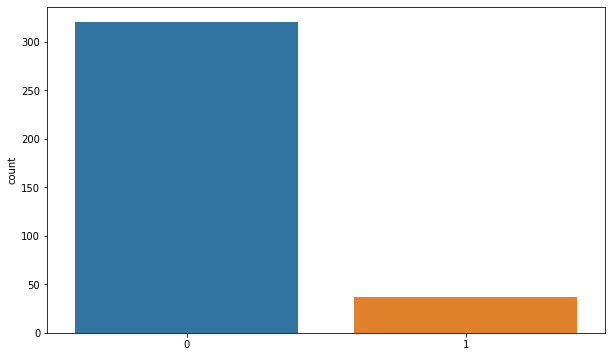

In [83]:
sns.countplot(y_pred)

In [84]:
confusion_matrix(y_test,y_pred)

array([[298,  12],
       [ 22,  25]], dtype=int64)

In [85]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(f'TN={tn}')
print(f'FP={fp}')
print(f'FN={fn}')
print(f'TP={tp}')

TN=298
FP=12
FN=22
TP=25


In [86]:
accuracy_score(y_test, y_pred)

0.9047619047619048

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [87]:
# Your conclusions here:

# The model is predicting worse the True Negative (0) values and True positive (1) compared to the logistic regression and the algorithm K-Nearest Neighbors (k=3). 
# From 310, we have 298 well assigned, which is 96% aprox.
# From 47 values only 25 are well assigned, which is only 53%. 

# Accuracy also decreased a little bit 90.75% to 90.5%

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [89]:
# Your code here
from sklearn.preprocessing import RobustScaler

In [91]:
# help(RobustScaler)

In [101]:
rs=RobustScaler()
X_train_rs=rs.fit_transform(X_train)
X_test_rs=rs.fit_transform(X_test)

In [102]:
model.fit(X_train_rs, y_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
model.score(X_train_rs, y_train)

0.9375

In [104]:
y_pred_rs= model.predict(X_test_rs)

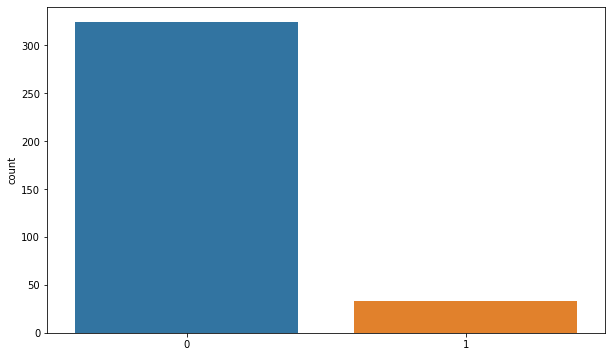

In [105]:
sns.countplot(y_pred_rs)

In [107]:
confusion_matrix(y_test,y_pred_rs)

array([[302,   8],
       [ 22,  25]], dtype=int64)

In [108]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rs).ravel()

print(f'TN={tn}')
print(f'FP={fp}')
print(f'FN={fn}')
print(f'TP={tp}')

TN=302
FP=8
FN=22
TP=25


In [111]:
accuracy_score(y_test, y_pred_rs)

0.9159663865546218

In [ ]:
# Your conclusions here:

# Robust Scaler --> Feature Scaling (standardize/normalize the range of independent variables or features of the data)
# Accuracy increased from 90.75% (LR) to 91.6% (LR+Robust Scaler)

# The model is predicting better both the True Negative (0) and True positive (1) values. 
# From 310, we have 302 well assigned, which is 97.4% aprox.
# From 47 values only 25 are well assigned, which is only 53%. 

